# **Kerasを用いた深層ニューラルネットワークによる回帰**

Scikit Learnの**医療系toy dataset、diabetes(糖尿病)**

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

は**回帰問題向き**です。このコンテンツは、深層ニューラルネットワークによる、KerasRegressorを利用した解法の実例としてshibuiwilliam
により、GitHubに公開されているものを引用、修正、増補したものです。

https://qiita.com/cvusk/items/33867fbec742bda3f307

https://github.com/shibuiwilliam/keras_regression_sample/blob/master/keras_regression.ipynb

よってメインのコンテンツはモデルの設計面ではこのソースを引用しつつ、赤間がColab用に独自に書き直したものになります。なお実行には時間がかかるので、授業中は深層学習を使わず、線形重回帰分析で済ませるかもしれません。

###

## 糖尿病データ

442人の糖尿病患者それぞれについて、年齢、性別、肥満度、平均血圧、および6つの血中血清測定の10個のベースラインの独立変数を与えてあります。

目的変数としては、ベースラインから1年後の疾患進行の定量的指標を注目すべき反応として与えてあります。

なおこのデータは既に正規化されているので、Scalorを用いる必要はありません。

cf.

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

References:

Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499. (https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

ただし、このデータセットはtoy datasetにありがちな精度の異様な高さが特徴的であり、機械学習のトレーニングにはあまり向かないと考えています。Scikit-learnを元にして、糖尿病データのノイズを含んだ私家版でこれと同型なものを作ることにしました。これはdataやtargetに正規ノイズや一様ノイズを加えたり、データ拡張(data augmentation)したりしたものです。

###

## ノイズを加えた糖尿病データ

**授業で利用するのは、sklearn.datasets.load_diabetes()のようなAPI互換の私家版 noisy toy datasetで、完全に公開されたデータとコードを用いているので、Cloud上での操作は問題はありません。またその意味でGitHubの公開リポジトリをColab上で学習者が!git cloneすることが可能となっています。**

ここでは、Scikit-learnのデータセットのように、オブジェクト指向でBunchを返すようにして、load_diabetes()のような形でデータをロードし、Pandasで利用できるような形にしました。**赤間のGitHubの公開リポジトリ**から読み込むことができます。

https://github.com/hilolani/noisy_diabetes

このリポジトリは、Colab上では、

**!pip install git+https://github.com/hilolani/noisy_diabetes.git**

によってインストールすることができます。

雑音を含む私家版データセットの作り方は以下の通りです。データに平均0,標準偏差0.1のガウシアンノイズを加え、データの精度を敢えて落としました。さらにデータ拡張(data augmentation)を想定した反復測定をシミュレートするために、ガウシアンノイズを加えてできたこのデフォルトの行データに対し、5回繰り返して一定の([-0.001, 0.001]の範囲で)一様ノイズを加えました。さらに生成した各行に対応するparticipantsとsessionsのナンバリングを追加しています。 このため、Pandasのto_csv()関数をindex=falseのオプション付きで利用し、read_csv()関数を使って読み取る際、diabetesのデータセットの既存のfeature namesに加え、dtype={'participants': int, 'sessions': int}を追加指定しています。

厳密に言うとこのノイズの加え方は正しくなく、GitHubの生データを使い、以下のように平均・標準偏差を求めて逆変換する必要があります。しかし、ここでは簡便さを重視してこの方法は取りませんでした。

df_raw = pd.read_csv("diabetes_data_raw_revised.csv", header=None)

X_raw = df_raw.iloc[:, :-1]

y_raw = df_raw.iloc[:, -1]

mean = X_raw.mean(axis=0)

std = X_raw.std(axis=0)

X_recovered = X_std * std.values + mean.values

また、目的変数も以下のようにしてノイズを加えています。追加5セッションのノイジーターゲットインデックス値'y_noisy'を作成する方法ですが、一様分布[-2, 2]の範囲に従うランダムな整数を使用して、各オリジナルのy値に追加しています。

**このGitHubリポジトリを立ち上げた目的は、誤ったデータ拡張で機械学習をモデル化すると、魔術的なブードゥー相関関係（Kriegeskorte）、ダブルディッピング、情報漏洩が起こり、結果として間違った結果が得られることを学習者に確認させるためです。ここでは、データ拡張は、同じ実験参加者に対する反復測定の結果として実現されると仮定すします。ノイズによるデータ拡張の例はnoisy_diabetes/noisyy_diabetes.pyに記述されており、実際の疑似データセットはnoisy_diabetes/noisyy_diabetes/dataに格納されています。**

**このようにして、系統的なノイズで補強された糖尿病のパブリックトイデータに、最も単純な多層パーセプトロンを適用する基本的な方法を通して、以下のことを実証しました。具体的には、特定の関心データ領域に焦点を当て、選択的にデータ拡張を適用する部分調整型ダブルディッピングは、データセット全体に一様にデータ拡張を適用する従来のダブルディッピングよりも、魔法的ブードゥー相関を成功裏にイカサマを達成する上で効果的であるということです。 **



Scikit Learn's medical toy dataset, diabetes

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

is suited for regression problems. This content is a quoted, modified, and expanded version of an example of a solution using KerasRegressor with a deep neural network by shibuiwilliam, published on GitHub.

https://qiita.com/cvusk/items/33867fbec742bda3f307

https://github.com/shibuiwilliam/keras_regression_sample/blob/master/keras_regression.ipynb

Therefore, the main contents are based on this source for the design of the model and rewritten by Akama for Colab.

###
Diabetes Data
For each of the 442 diabetic patients, we are given 10 baseline independent variables of age, gender, body mass index, mean blood pressure, and six blood serum measures.
The objective variable is a quantitative measure of disease progression from baseline to one year as the response of interest.
Note that this data is already normalized, so there is no need to use Scalor.

cf.
https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

References.

Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics ( with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

However, this dataset is characterized by the oddly high accuracy typical of toy datasets, and we do not think it is suitable for machine learning training. This is a data augmentation (data augmentation) or adding normal noise or uniform noise to data or target.
###
Diabetes data with noise added

We will use a private API-compatible noisy toy dataset like sklearn.datasets.load_diabetes() in class, which uses fully public data and code, so manipulating it on the Cloud is not a problem. Also in that sense, it is possible for the learner to !git clone the public repository on GitHub on Colab.
Here, we have made it object-oriented and return Bunch, like a Scikit-learn dataset, and loaded the data in a form like load_diabetes(), which can then be used in Pandas. You can load it from the public GitHub repository, which is the following.

https://github.com/hilolani/noisy_diabetes

This repository can be installed on Colab by running,

!pip installgit+https://github.com/hilolani/noisy_diabetes.git

The following is how to create a private dataset containing noise. Gaussian noise with a mean of 0 and standard deviation of 0.1 is added to the data to reduce the accuracy of the data. To simulate repeated measurements for data augmentation, we added a constant (in the range of [-0.001, 0.001]) uniform noise to this default row data, which was created by adding Gaussian noise, for 5 iterations. We also added the numbering of participants and sessions corresponding to each generated row. For this reason, we used Pandas' to_csv() function with the index=false option, and when reading using the read_csv() function, in addition to the existing feature names in the diabetes data set, we added dtype={'participants': int, 'sessions': int} in addition to the existing feature names in the diabetes dataset.

Strictly speaking, this addition of noise is not correct and requires using the raw data from GitHub and back-transforming to obtain the mean and standard deviation as follows. However, we did not use this method here for the sake of simplicity.

df_raw = pd.read_csv(“diabetes_data_raw_revised.csv”, header=None)

X_raw = df_raw.iloc[:, :-1]

y_raw = df_raw.iloc[:, -1]

mean = X_raw.mean(axis=0)

std = X_raw.std(axis=0)

X_recovered = X_std * std.values + mean.values

The objective variable is also noisy as follows. To create the additional 5 session noisy target index value 'y_noisy', we used a random integer that follows a uniform distribution [-2, 2] range and adding it to each original y value.

The purpose of setting up this GitHub repository is to confirm for the learner that modeling machine learning with the wrong data extension can lead to magical voodoo correlation (Kriegeskorte), double dipping, and information leakage, resulting in wrong results. Here we assume that data augmentation is realized as a result of repeated measurements on the same experimental participant. An example of data augmentation by noise is described in noisy_diabetes/noisyyy_diabetes.py and the actual pseudo-dataset is stored in noisy_diabetes/noisyyy_diabetes/data.

*Through this basic method of applying the simplest multilayer perceptron to diabetes public toy data augmented with systematic noise, we have demonstrated the following. Specifically, that partial-tuned double-dipping, which focuses on specific data regions of interest and selectively applies data expansion, is more effective than traditional double-dipping, which applies data expansion uniformly to the entire data set, in successfully achieving magical voodoo correlation cheating . *


## Scikerasについて赤間よりワーニング

shibuiwilliamのコードをGoogle Colabで実行するためにScikerasを使用します。原作者のコードそのままではGoogle Colabで使えません。

from keras.wrappers.scikit_learn import KerasRegressor
が通らないので、その代りに、KerasのモデルをScikit-learnのエスティメーター（Estimator）としてラップ（包む）できるScikerasを使います。

著作権を尊重するために終わりに元のコードを掲載していますが、赤間が書き換えたものを実行します。そのままでも通る部分が多いですが、Scikerasの仕様上warningが出ます。

Scikeras は、Keras と Scikit-learn の統合を容易にするためのライブラリです。Kerasはディープラーニングのフレームワークであり、Scikit-learnは機械学習のためのツールキットですが、Scikerasはこの両者をシームレスに連携させるために使われます。Kerasで構築したディープラーニングモデルを、Scikit-learnの一貫したインターフェースで使用できるようになります。

See

**https://stackoverflow.com/questions/77104125/no-module-named-keras-wrappers**

**https://adriangb.com/scikeras/stable/**

SciKerasのドキュメントによると

「scikerasのゴールは、Keras/TensorFlowをsklearnで使えるようにすることです。これは、Scikit-Learnインターフェイスを持つKerasのラッパーを提供することで達成されます。SciKerasはkeras.wrappers.scikit_learnの後継であり、TensorFlowバージョンのラッパーよりも多くの改善を提供しています。」



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#この後のColabの使い方についてはパワーポイント教材を参考にしてください。
from google.colab import files
#Google Driveにファイルをアップロードしたりする場合に確実なインタフェースを提供します。

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pds
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
!pip install scikeras

In [ ]:
!pip install japanize-matplotlib
#日本語の文字フォントを入れる

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=57ad06e0deaf79c6e902f10cfa20c3a5edb26c71341dab353a5c458e22594b54
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib
sns.set_style('whitegrid')
japanize_matplotlib.japanize()#日本語の文字フォントが使えるようにする
%matplotlib inline

In [ ]:
!pip install git+https://github.com/hilolani/noisy_diabetes.git
#赤間のGitHubリポジトリからnoisyな糖尿病データをインストール
"""
上手く行かない場合は次をお試しください。
!git clone https://github.com/hilolani/noisy_diabetes.git
%pwd
%cd noisy_diabetes
!pip install .
"""

  Cloning https://github.com/hilolani/noisy_diabetes.git to /tmp/pip-req-build-aege7592
  Running command git clone --filter=blob:none --quiet https://github.com/hilolani/noisy_diabetes.git /tmp/pip-req-build-aege7592
  Resolved https://github.com/hilolani/noisy_diabetes.git to commit af7b5bd51ce9f32087033769fc2fba4034acd114
  Preparing metadata (setup.py) ... done
  Created wheel for noisy_diabetes: filename=noisy_diabetes-0.1-py3-none-any.whl size=266037 sha256=0a5a1e3ae887417a406879da8d17e047ef4e592f2cb1d7ffe1b46420355bd1b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-du5li_xv/wheels/75/e6/d7/eac04db54d21e6eb8a3445c05b9f40d002d2fc007c4637e2f6
Successfully built noisy_diabetes


'\n上手く行かない場合は次をお試しください。\n!git clone https://github.com/hilolani/noisy_diabetes.git\n%pwd\n%cd noisy_diabetes\n!pip install .\n'

In [ ]:
from scikeras.wrappers import KerasRegressor

In [ ]:
# import libraries
import numpy as np
import pandas as pds
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, layers
#from keras.wrappers.scikit_learn import KerasRegressor
#これは原作者のコードにありますが、Google Colabでは通りません。
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

In [ ]:
from noisy_diabetes import *

In [ ]:
noisy_diabetes = load_noisy_diabetes()
pds.DataFrame(noisy_diabetes.data, columns=("age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"))

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,-0.107226,0.050680,0.073729,0.108586,0.033467,-0.115613,-0.036430,0.043853,-0.008717,-0.115178
1,0.053797,-0.044642,-0.090275,-0.081516,0.081129,0.103402,0.130280,-0.013074,-0.126097,-0.041420
2,0.110727,0.050680,0.167225,0.106081,-0.105451,-0.094694,0.087756,-0.052354,-0.102463,-0.137767
3,-0.107226,0.050680,-0.058498,-0.056409,-0.085503,0.116698,-0.102307,0.082742,0.099401,0.135612
4,0.000717,-0.044642,-0.013336,0.120537,0.059739,0.001825,0.005390,0.014153,-0.044340,-0.059418
...,...,...,...,...,...,...,...,...,...,...
437,0.047968,-0.044642,-0.062424,-0.016583,0.012260,-0.115613,-0.011174,0.057147,0.133597,0.132844
438,0.050841,-0.044642,-0.015549,-0.112399,0.153914,0.147773,0.071706,0.103977,0.133597,0.054089
439,0.110727,0.050680,0.149370,0.042599,-0.094609,-0.102333,0.010200,-0.076395,0.081887,0.104606
440,0.110727,0.026777,0.059886,-0.112399,0.153914,0.140372,-0.073985,0.039052,0.068419,-0.048736


In [ ]:
# load them to X and Y
X = np.array(noisy_diabetes.data)
Y = noisy_diabetes.target
# show their shapes
X.shape, Y.shape

((442, 10), (442,))

In [ ]:
Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

# **Scikerasを用いた深層学習モデル**

ネットワーク図を描くために

https://mennmabacon.hatenablog.com/entry/2021/11/30/%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%E3%81%AE%E5%9B%B3%E3%82%92%E6%8F%8F%E3%81%8F%E3%81%9F%E3%82%81%E3%81%AEPython%E3%82%B3%E3%83%BC

にある実装を利用させていただく

In [ ]:
"""
ScikerasはKerasのSequentialモデルを定義するときに、
Denseレイヤーにinput_dimを直接渡すのではなく、
Inputレイヤーを明示的に使用して入力形状を指定することを推奨しています。
"""

def reg_model2():
    # Input layerを明示的に定義
    inputs = keras.Input(shape=(10,))

    # Hidden layers
    x = keras.layers.Dense(10, activation='relu')(inputs)
    x = keras.layers.Dense(16, activation='relu')(x)

    # Output layer
    outputs = keras.layers.Dense(1)(x)

    # Modelの定義
    model2 = keras.Model(inputs=inputs, outputs=outputs)

    # コンパイル
    model2.compile(loss="mean_squared_error", optimizer="adam")
    #ここでは損失関数として、平均二乗誤差（MSE：Mean Squared Error）を使う。
    #各データに対して平均二乗誤差（MSE：Mean Squared Error）すなわち予測値と正解値の差である誤差の二乗を計算し、
    #その総和をデータ数で割った値（平均値）を出力する関数を使っている。
    return model2

# モデルを作成
model = reg_model2()

# モデルのサマリーを表示
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

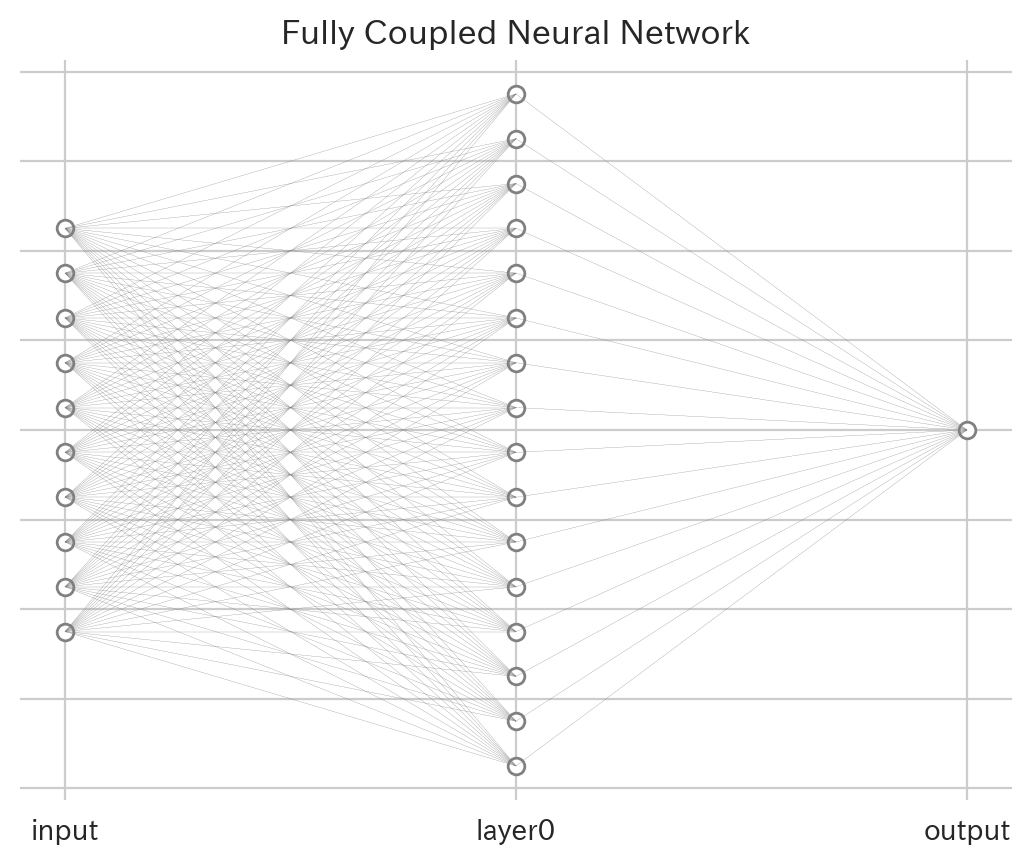

In [ ]:
from itertools import product
plt.rcParams['figure.dpi'] = 200

def make_nodes(num):
  return list(np.arange(-(num-1)/2, (num-1)/2+1,1))

def neural_network_img(*nodes_nums):
  n = len(nodes_nums)
  nodes_list = [make_nodes(num) for num in nodes_nums]
  edge_list = [list(product(nodes_list[i],nodes_list[i+1])) for i in range(n-1)]

  plt.figure()
  for i, edges in enumerate(edge_list):
    for edge in edges:
      plt.plot([i,i+1], edge, color='gray', linewidth=0.1)
  for i, nodes in enumerate(nodes_list):
    plt.scatter(np.full_like(nodes,i),nodes,c='white',edgecolors='gray')
  plt.xticks(ticks=list(range(n)),labels=['input']+[f'layer{i}' for i in range(n-2)]+['output'])
  plt.tick_params(bottom=False,
               left=False,
               right=False,
               top=False,
               labelbottom=True,
               labelleft=False,
               labelright=False,
               labeltop=False)
  ax = plt.gca()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.set_title('Fully Coupled Neural Network')
  plt.show()

neural_network_img(10,16,1)

# **交差評価(Cross-validation)を利用したモデルの実行と評価**

赤間が交差評価の層化におけるデータ番号を見える化し、回帰の結果を散布図に表してそれを評価したもの。

In [ ]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X, Y)
print(kf)
y_index_list = []
y_test_list = []
y_pred_list = []

X = pds.DataFrame(X)
Y = pds.DataFrame(Y)
#参加者番号を取得するためにPandasのDataFrameに変換する

for i, (train_index, test_index) in enumerate(kf.split(X, Y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test = Y.iloc[test_index]
    y_train=np.reshape(y_train,(-1))
    y_test=np.reshape(y_test,(-1))
    estimator = KerasRegressor(model=reg_model2, epochs=100, batch_size=10, verbose=0)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(f"実測値 ={y_test}")
    print(f"予測値 ={y_pred}")
    mse = mean_squared_error(y_test, y_pred)
    print("KERAS REG RMSE : %.2f" % (mse ** 0.5))
    y_index_list.append(test_index)
    y_test_list.append(y_test)
    y_pred_list.append(y_pred)
    print()

KFold(n_splits=5, random_state=0, shuffle=True)
Fold 0:
  Train: index=[  0   2   3   4   5   7   8   9  11  13  14  16  17  18  19  20  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42
  43  44  45  46  47  48  50  51  53  55  57  58  61  62  63  64  66  67
  68  69  70  72  73  74  75  77  79  80  81  82  83  84  85  86  87  88
  89  91  92  93  94  95  97  98  99 101 103 104 105 106 108 109 110 111
 112 114 115 116 117 119 120 121 123 125 126 127 128 129 130 131 133 135
 136 137 138 139 140 143 145 146 147 148 149 150 151 152 153 154 156 161
 162 163 165 166 167 168 169 172 173 174 175 176 177 178 180 181 182 183
 184 185 187 189 190 191 192 193 195 196 197 199 200 201 202 203 204 207
 209 210 211 212 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 234 235 236 237 239 240 241 242 243 244 245 246 247
 248 250 251 252 253 254 255 256 257 258 259 260 262 263 264 265 266 267
 269 270 272 273 274 275 277 278 279 280 281 285 286 

In [ ]:
def flatten(lst):
    return np.concatenate(lst)
#ネストされたリストのネストを外す関数

In [ ]:
index_list = flatten(y_index_list)
#print(len(index_list))
#print(index_list)
print()
y_val_list = flatten(y_test_list)
#print(len(y_val_list))
#print(y_val_list)
print()
y_pred_val_list = flatten(y_pred_list)
#print(len(y_pred_val_list))
#print(y_pred_val_list)

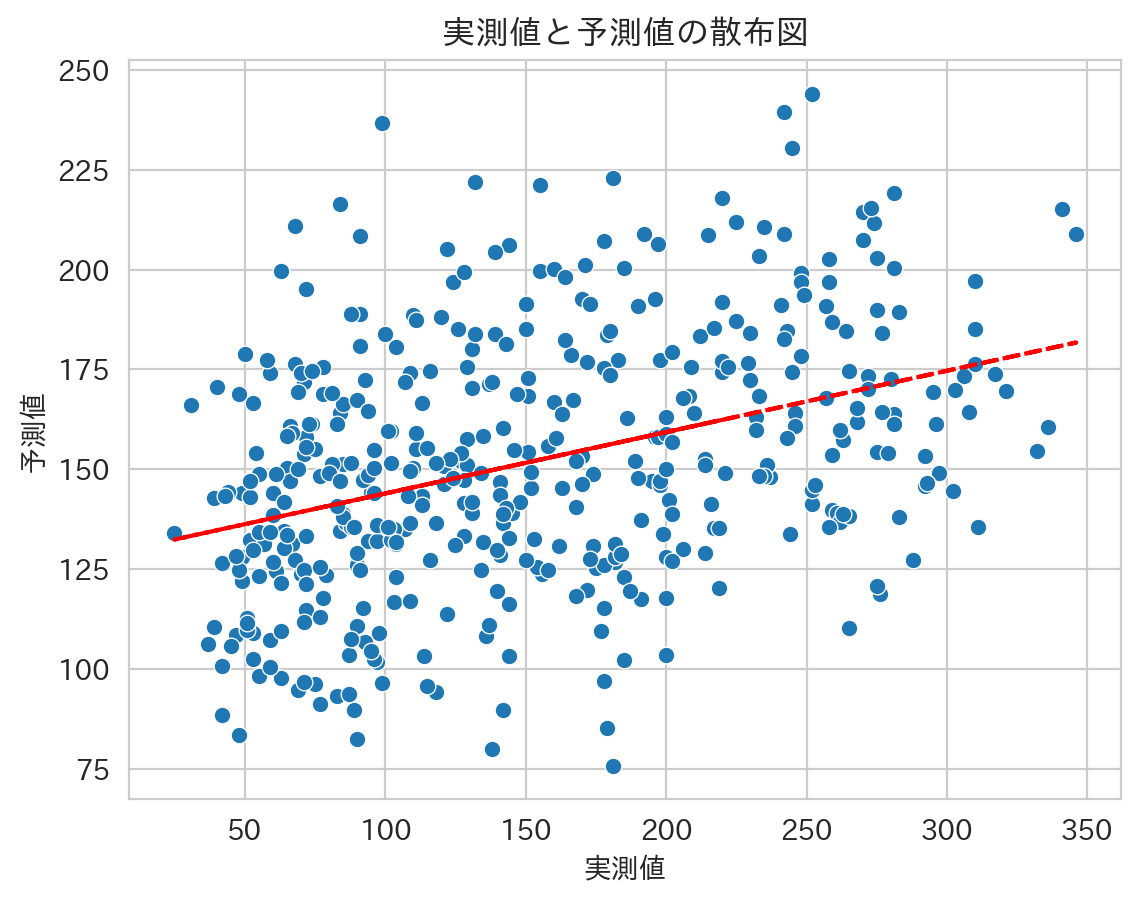

回帰直線: y= 
0.1537 x + 128.6
相関係数:          実測値       予測値
実測値  1.000000  0.376345
予測値  0.376345  1.000000


In [ ]:
df = pds.DataFrame([y_val_list, y_pred_val_list]).T#Pandasのデータフレーム化
df_new = df.rename(columns={0: '実測値', 1:'予測値'})#列名の変更
sns.scatterplot(x='実測値',y='予測値',data=df_new)
plt.title('実測値と予測値の散布図')
plt.xlabel('実測値')
plt.ylabel('予測値')
z = np.polyfit(y_val_list, y_pred_val_list, 1)#線形回帰直線の計算
p = np.poly1d(z)
plt.plot(y_val_list, p(y_val_list), "r--")
plt.show()
print(f"回帰直線: y={p}")
res=df_new.corr() #PandasのDataFrameで相関係数を計算する
print(f"相関係数:{res}")

In [ ]:
from scipy.stats import t

r = 0.376345
n = 442
#無相関検定をやってみる
t_stat = r * np.sqrt((n - 2) / (1 - r ** 2))
p_val = 2 * t.sf(np.abs(t_stat), df=n - 2)
print(p_val)
#2.549145649539668e-16なので相関はあるが、不満。

2.549145649539668e-16


# **誤ったデータ拡張--二度漬けもしくは魔術的(ブードゥー)相関（その１）**

A君のやり方。データ拡張のため、反復測定のすべてのデータを実験参加者の区別なく投入したもの。トレーニングセット、テストセットの双方に同一患者からのデータが入っているのでdouble dippingになる。

In [ ]:
total_noisy_diabetes = load_total_noisy_diabetes()
df_total = pds.DataFrame(total_noisy_diabetes.data, columns=("participants", "sessions", "age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"))
df_total

,participants,sessions,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0,0,-0.107226,0.050680,0.073729,0.108586,0.033467,-0.115613,-0.036430,0.043853,-0.008717,-0.115178
1,0,1,-0.107254,0.051164,0.073112,0.108686,0.033907,-0.115258,-0.036340,0.044152,-0.009285,-0.114733
2,0,2,-0.107879,0.051455,0.073902,0.108866,0.033473,-0.116342,-0.036398,0.043215,-0.008695,-0.115840
3,0,3,-0.107753,0.049759,0.073995,0.108848,0.033446,-0.115316,-0.035820,0.043690,-0.009423,-0.115210
4,0,4,-0.107363,0.050990,0.073846,0.109327,0.032722,-0.115243,-0.036483,0.043051,-0.009518,-0.114587
...,...,...,...,...,...,...,...,...,...,...,...,...
2647,441,1,-0.012037,0.051532,-0.090679,0.001281,0.122911,0.001370,0.182082,-0.075786,0.094903,0.096780
2648,441,2,-0.012543,0.050103,-0.090297,0.002462,0.121620,0.000514,0.180313,-0.076701,0.094544,0.096711
2649,441,3,-0.012821,0.050231,-0.089817,0.002347,0.122144,0.001999,0.180549,-0.076293,0.094155,0.096137
2650,441,4,-0.013084,0.051335,-0.089856,0.001280,0.121424,0.001841,0.181477,-0.076037,0.095077,0.095085


In [ ]:
pds.DataFrame(total_noisy_diabetes.target, columns=(["index"]))

,index
0,151.0
1,149.0
2,151.0
3,153.0
4,149.0
...,...
2647,59.0
2648,55.0
2649,56.0
2650,58.0


# A君の方法、ここまでは良かったが。

In [ ]:
df_total.loc[:, 'age':'glu']

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,-0.107226,0.050680,0.073729,0.108586,0.033467,-0.115613,-0.036430,0.043853,-0.008717,-0.115178
1,-0.107254,0.051164,0.073112,0.108686,0.033907,-0.115258,-0.036340,0.044152,-0.009285,-0.114733
2,-0.107879,0.051455,0.073902,0.108866,0.033473,-0.116342,-0.036398,0.043215,-0.008695,-0.115840
3,-0.107753,0.049759,0.073995,0.108848,0.033446,-0.115316,-0.035820,0.043690,-0.009423,-0.115210
4,-0.107363,0.050990,0.073846,0.109327,0.032722,-0.115243,-0.036483,0.043051,-0.009518,-0.114587
...,...,...,...,...,...,...,...,...,...,...
2647,-0.012037,0.051532,-0.090679,0.001281,0.122911,0.001370,0.182082,-0.075786,0.094903,0.096780
2648,-0.012543,0.050103,-0.090297,0.002462,0.121620,0.000514,0.180313,-0.076701,0.094544,0.096711
2649,-0.012821,0.050231,-0.089817,0.002347,0.122144,0.001999,0.180549,-0.076293,0.094155,0.096137
2650,-0.013084,0.051335,-0.089856,0.001280,0.121424,0.001841,0.181477,-0.076037,0.095077,0.095085


In [ ]:
X = np.array(df_total.loc[:, 'age':'glu'])
Y = flatten(np.array(total_noisy_diabetes.target))#good.
# show their shapes
X.shape, Y.shape

((2652, 10), (2652,))

In [ ]:
X

array([[-0.10722563,  0.05068012,  0.07372904, ...,  0.04385296,
        -0.0087174 , -0.11517846],
       [-0.10725371,  0.05116375,  0.07311227, ...,  0.04415198,
        -0.00928486, -0.11473292],
       [-0.10787868,  0.05145539,  0.07390227, ...,  0.04321513,
        -0.00869473, -0.11584044],
       ...,
       [-0.0128212 ,  0.05023102, -0.08981704, ..., -0.07629273,
         0.09415485,  0.09613719],
       [-0.01308362,  0.05133526, -0.08985625, ..., -0.07603668,
         0.09507686,  0.09508527],
       [-0.01330087,  0.04974524, -0.0908698 , ..., -0.07679315,
         0.09437093,  0.09618987]])

Fold 0:
実測値 =[149.  74.  74. 142. 204. 204. 137.  99. 140. 139. 112. 309.  69.  71.
 181. 171. 165. 145.  95.  99. 168.  66.  67.  68.  69.  67. 245. 184.
 186. 182. 137.  85. 284. 130.  60. 341. 339. 340.  65. 103. 267. 276.
 278. 251.  90. 102. 102.  54.  53.  61.  90.  55. 190.  77. 141. 143.
 153. 156. 225. 225.  61.  57. 105. 183. 128. 127. 170. 170. 168.  60.
  69. 163. 152. 152.  97.  95. 177.  47.  49. 271. 200. 111. 111.  83.
  41.  41. 170. 200. 112. 143. 142.  51.  53.  52. 211.  56. 134. 133.
 133. 110.  96. 164. 166.  96.  96.  94.  90.  90.  89.  90. 148. 148.
 279.  83. 304. 304. 198. 197. 199.  52. 135. 133. 146. 233. 233.  59.
  59.  60. 299. 260. 259. 260. 273. 281. 280. 179. 179. 180. 180. 198.
 198. 200. 171. 172.  85. 120. 119. 122. 101. 100. 109. 109. 115. 276.
 102. 105. 274.  85. 280. 337. 280. 318. 318. 235.  58. 173. 178. 178.
 128. 130.  97. 127. 125. 124. 125. 290.  86.  90. 291. 291. 197. 198.
 195. 187.  25.  23.  94. 196.  51.  55.  55. 217. 216. 129. 131

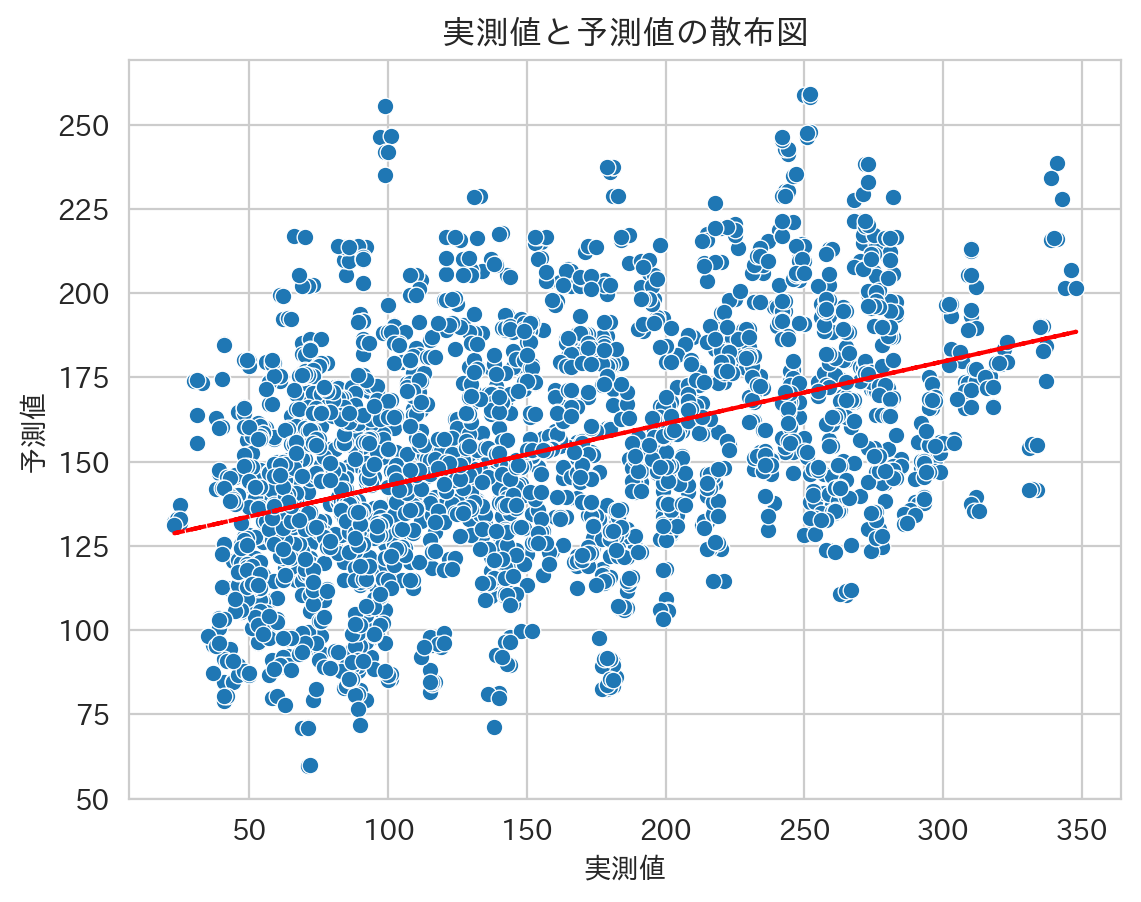

回帰直線: y= 
0.184 x + 124.5
相関係数:          実測値       予測値
実測値  1.000000  0.422492
予測値  0.422492  1.000000
Fold 0:
実測値 =[149.  74.  74. 142. 204. 204. 137.  99. 140. 139. 112. 309.  69.  71.
 181. 171. 165. 145.  95.  99. 168.  66.  67.  68.  69.  67. 245. 184.
 186. 182. 137.  85. 284. 130.  60. 341. 339. 340.  65. 103. 267. 276.
 278. 251.  90. 102. 102.  54.  53.  61.  90.  55. 190.  77. 141. 143.
 153. 156. 225. 225.  61.  57. 105. 183. 128. 127. 170. 170. 168.  60.
  69. 163. 152. 152.  97.  95. 177.  47.  49. 271. 200. 111. 111.  83.
  41.  41. 170. 200. 112. 143. 142.  51.  53.  52. 211.  56. 134. 133.
 133. 110.  96. 164. 166.  96.  96.  94.  90.  90.  89.  90. 148. 148.
 279.  83. 304. 304. 198. 197. 199.  52. 135. 133. 146. 233. 233.  59.
  59.  60. 299. 260. 259. 260. 273. 281. 280. 179. 179. 180. 180. 198.
 198. 200. 171. 172.  85. 120. 119. 122. 101. 100. 109. 109. 115. 276.
 102. 105. 274.  85. 280. 337. 280. 318. 318. 235.  58. 173. 178. 178.
 128. 130.  97. 127. 125. 124. 1

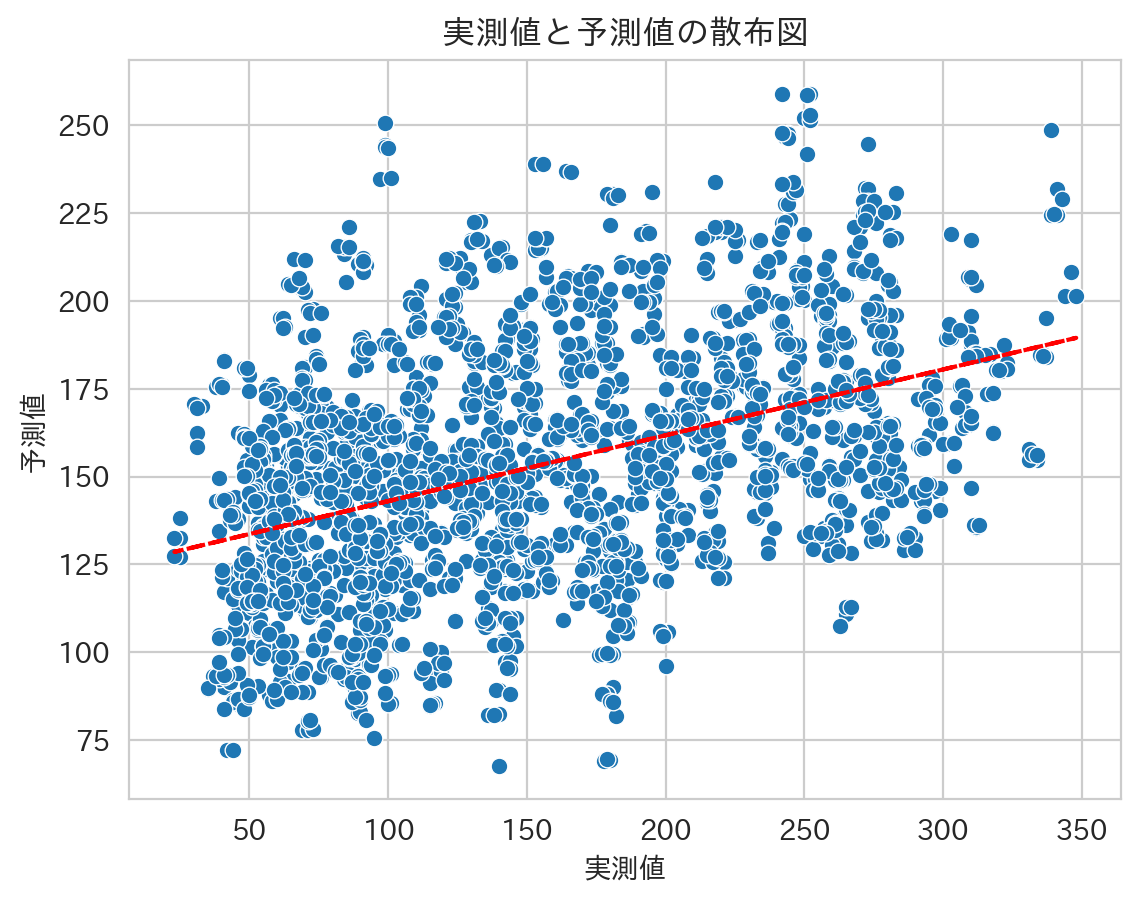

回帰直線: y= 
0.1872 x + 124.3
相関係数:          実測値       予測値
実測値  1.000000  0.428947
予測値  0.428947  1.000000


In [ ]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X, Y)
#print(kf)
y_index_list = []
y_test_list = []
y_pred_list = []

X = pds.DataFrame(X)
Y = pds.DataFrame(Y)
#参加者番号を取得するためにPandasのDataFrameに変換する

for i, (train_index, test_index) in enumerate(kf.split(X, Y)):
    print(f"Fold {i}:")
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test = Y.iloc[test_index]
    y_train=np.reshape(y_train,(-1))
    y_test=np.reshape(y_test,(-1))
    estimator = KerasRegressor(model=reg_model2, epochs=100, batch_size=10, verbose=0)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(f"実測値 ={y_test}")
    print(f"予測値 ={y_pred}")
    mse = mean_squared_error(y_test, y_pred)
    print("KERAS REG RMSE : %.2f" % (mse ** 0.5))
    y_index_list.append(test_index)
    y_test_list.append(y_test)
    y_pred_list.append(y_pred)
    #print()

index_list = flatten(y_index_list)
#print(len(index_list))
#print(index_list)
#print()
y_val_list = flatten(y_test_list)
#print(len(y_val_list))
#print(y_val_list)
#print()
y_pred_val_list = flatten(y_pred_list)
#print(len(y_pred_val_list))
#print(y_pred_val_list)

df = pds.DataFrame([y_val_list, y_pred_val_list]).T#Pandasのデータフレーム化
df_new = df.rename(columns={0: '実測値', 1:'予測値'})#列名の変更
sns.scatterplot(x='実測値',y='予測値',data=df_new)
plt.title('実測値と予測値の散布図')
plt.xlabel('実測値')
plt.ylabel('予測値')
z = np.polyfit(y_val_list, y_pred_val_list, 1)#線形回帰直線の計算
p = np.poly1d(z)
plt.plot(y_val_list, p(y_val_list), "r--")
plt.show()
print(f"回帰直線: y={p}")
res=df_new.corr() #PandasのDataFrameで相関係数を計算する
print(f"相関係数:{res}")

In [ ]:
from scipy.stats import t

r = 0.422492
n = 2652
#無相関検定をやってみる
t_stat = r * np.sqrt((n - 2) / (1 - r ** 2))
p_val = 2 * t.sf(np.abs(t_stat), df=n - 2)
print(p_val)
#p値は2.624772854736399e-115

2.624772854736399e-115


# 間違い！

# **誤ったデータ拡張--二度漬けもしくは魔術的(ブードゥー)相関(その２)**

度数分布表のすべてのbinsの高さを揃え、稀少でクリティカルな関心領域のみデータ拡張したもの。テストセットの分散についてはじめからわかっているinformation leakageのみならず、この関心領域では必然的に同一人物からデータがトレーニングセット、テストセットにまたがって配置されるので、double dippingになる。

B君がnoisy_diabetesの指標値の度数分布表を作ってみたら、150から先のbinの高さが足りない(データサイズが小さい)のに気になった。データ拡張の方法として、そこにこれまでの時系列データ(total_noisy_diabetes)からデータを補充してﾋﾞﾝの高さを揃えることを考えた。

Bin 1: 25.00 to 89.20, Count = 118
Bin 2: 89.20 to 153.40, Count = 130
Bin 3: 153.40 to 217.60, Count = 91
Bin 4: 217.60 to 281.80, Count = 80
Bin 5: 281.80 to 346.00, Count = 23
[[25.0, 89.2, 118], [89.2, 153.4, 130], [153.4, 217.60000000000002, 91], [217.60000000000002, 281.8, 80], [281.8, 346.0, 23]]


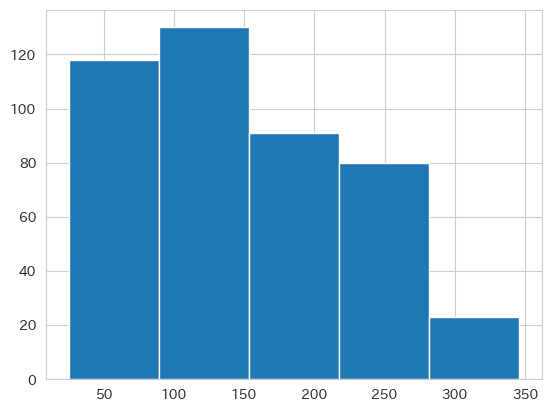

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
counts, bin_edges, patches = ax.hist(noisy_diabetes.target, bins=5)
bin_info = []

# 各ビンの範囲を表示
for i in range(len(counts)):
    left = bin_edges[i]
    right = bin_edges[i+1]
    height = counts[i]
    print(f"Bin {i+1}: {left:.2f} to {right:.2f}, Count = {int(height)}")
    bin_info.append([float(left), float(right), int(height)])
print(bin_info)

# 以下は誤ったデータ拡張法なのでPythonマニア以外は読まなくて良いです。

In [ ]:
binwiseaugmentation = [[i[0], i[1], 130 - i[2]] for i in bin_info]#一番背の高いbin2だけ増やさない。
print(binwiseaugmentation)
#binwiseaugmentationはそれぞれのbinでどれだけデータ拡張するかサイズを求めるもの
increase = [i[2] for i in binwiseaugmentation]
print(increase)

[[25.0, 89.2, 12], [89.2, 153.4, 0], [153.4, 217.60000000000002, 39], [217.60000000000002, 281.8, 50], [281.8, 346.0, 107]]
[12, 0, 39, 50, 107]


In [ ]:
#それぞれのbinに属する参加者番号
parindexpair = [[i[0], float(i[1])] for i in  [list(x) for x in zip(*[list(range(0, len(Y))),Y])]]
#print(parindexpair) #[[0, 151.0], [1, 75.0], [2, 141.0],...]
#len([i[0] for i in parindexpair if (i[1]>=25.00 and i[1]<89.20)]) #118, so good.
parbin0 = [i[0] for i in parindexpair if (i[1]>=binwiseaugmentation[0][0] and i[1]<binwiseaugmentation[0][1])]
parbin1 = [i[0] for i in parindexpair if (i[1]>=binwiseaugmentation[1][0] and i[1]<binwiseaugmentation[1][1])]
parbin2 = [i[0] for i in parindexpair if (i[1]>=binwiseaugmentation[2][0] and i[1]<binwiseaugmentation[2][1])]
parbin3 = [i[0] for i in parindexpair if (i[1]>=binwiseaugmentation[3][0] and i[1]<binwiseaugmentation[3][1])]
parbin4 = [i[0] for i in parindexpair if (i[1]>=binwiseaugmentation[4][0] and i[1]<=binwiseaugmentation[4][1])]

In [ ]:
#total_noisy_diabetes.data（df_total）からsessionsが0の行を除き、各binの当該participantsの行を(candidatesとして)抽出、
#その中からランダムにincrease分の行を抜き出すとする。
#df_total

In [ ]:
df_total_parbin0 = df_total.query('sessions != 0 and participants in @parbin0')
df_total_parbin1 = df_total.query('sessions != 0 and participants in @parbin1')
df_total_parbin2 = df_total.query('sessions != 0 and participants in @parbin2')
df_total_parbin3 = df_total.query('sessions != 0 and participants in @parbin3')
df_total_parbin4 = df_total.query('sessions != 0 and participants in @parbin4')
#df_total_parbin0

In [ ]:
aug0 = random.sample(list(df_total_parbin0.index), increase[0])
#parbin1は増やさない。
aug2 = random.sample(list(df_total_parbin2.index), increase[2])
aug3 = random.sample(list(df_total_parbin3.index), increase[3])
aug4 = random.sample(list(df_total_parbin4.index), increase[4])

In [ ]:
augtotal = [i.item() for i in np.sort(np.concatenate([aug0, aug2, aug3, aug4]))]
print(augtotal)#データ拡張の時に入れるセッションナンバー
originalintotal = list(df_total.query('sessions == 0').index)
print(originalintotal)#拡張前のデータ
selectedsessions = [i.item() for i in np.sort(np.concatenate([augtotal, originalintotal]))]
print(selectedsessions)#両者を合併

[55, 56, 58, 59, 146, 155, 175, 176, 177, 179, 193, 194, 195, 196, 221, 307, 311, 327, 374, 393, 417, 458, 467, 470, 490, 518, 572, 574, 613, 614, 615, 616, 617, 621, 649, 651, 679, 680, 681, 682, 692, 693, 699, 719, 735, 791, 812, 814, 825, 829, 830, 831, 832, 833, 835, 839, 847, 848, 849, 850, 854, 869, 873, 880, 902, 903, 904, 905, 913, 914, 915, 916, 917, 922, 1003, 1033, 1034, 1035, 1036, 1037, 1061, 1064, 1106, 1139, 1141, 1142, 1143, 1144, 1145, 1151, 1213, 1259, 1295, 1303, 1304, 1305, 1306, 1307, 1384, 1429, 1436, 1443, 1445, 1501, 1502, 1503, 1504, 1505, 1509, 1525, 1526, 1527, 1528, 1529, 1537, 1538, 1539, 1540, 1541, 1553, 1573, 1574, 1575, 1576, 1577, 1611, 1633, 1634, 1637, 1657, 1658, 1659, 1660, 1661, 1683, 1706, 1725, 1741, 1742, 1743, 1744, 1745, 1760, 1761, 1815, 1817, 1825, 1843, 1867, 1882, 1883, 1897, 1929, 1943, 1946, 1949, 1955, 1965, 1967, 1982, 2017, 2018, 2019, 2020, 2021, 2029, 2049, 2068, 2097, 2104, 2156, 2157, 2158, 2159, 2173, 2174, 2175, 2176, 2177, 217

In [ ]:
# 元のインデックスを 'selectedsessions' 列に
df_selected = df_total.loc[selectedsessions].copy()
df_selected["selectedsessions"] = df_selected.index
df_selected.reset_index(drop=True, inplace=True)

# 列の順序を変更して 'selectedsessions' を最初に
cols = ['selectedsessions'] + [col for col in df_selected.columns if col != 'selectedsessions']
df_selected = df_selected[cols]

df_selected

,selectedsessions,participants,sessions,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0,0,0,-0.107226,0.050680,0.073729,0.108586,0.033467,-0.115613,-0.036430,0.043853,-0.008717,-0.115178
1,6,1,0,0.053797,-0.044642,-0.090275,-0.081516,0.081129,0.103402,0.130280,-0.013074,-0.126097,-0.041420
2,12,2,0,0.110727,0.050680,0.167225,0.106081,-0.105451,-0.094694,0.087756,-0.052354,-0.102463,-0.137767
3,18,3,0,-0.107226,0.050680,-0.058498,-0.056409,-0.085503,0.116698,-0.102307,0.082742,0.099401,0.135612
4,24,4,0,0.000717,-0.044642,-0.013336,0.120537,0.059739,0.001825,0.005390,0.014153,-0.044340,-0.059418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,2622,437,0,0.047968,-0.044642,-0.062424,-0.016583,0.012260,-0.115613,-0.011174,0.057147,0.133597,0.132844
646,2628,438,0,0.050841,-0.044642,-0.015549,-0.112399,0.153914,0.147773,0.071706,0.103977,0.133597,0.054089
647,2634,439,0,0.110727,0.050680,0.149370,0.042599,-0.094609,-0.102333,0.010200,-0.076395,0.081887,0.104606
648,2640,440,0,0.110727,0.026777,0.059886,-0.112399,0.153914,0.140372,-0.073985,0.039052,0.068419,-0.048736


In [ ]:
df_total_target = pds.DataFrame(total_noisy_diabetes.target.copy(), columns=(["index"]))
df_selected_target = df_total_target.loc[selectedsessions].copy()
#pds.DataFrame(df_selected_target, columns=(["index"]))
df_selected_target["selectedsessions"] = df_selected_target.index
df_selected_target.reset_index(drop=True, inplace=True)
cols = ['selectedsessions'] + [col for col in df_selected_target.columns if col != 'selectedsessions']
df_selected_target = df_selected_target[cols]

df_selected_target

,selectedsessions,index
0,0,151.0
1,6,75.0
2,12,141.0
3,18,206.0
4,24,135.0
...,...,...
645,2622,178.0
646,2628,104.0
647,2634,132.0
648,2640,220.0


In [ ]:
selectedtarget = np.array(df_selected_target["index"])

Bin 1: 25.00 to 89.60, Count = 130
Bin 2: 89.60 to 154.20, Count = 131
Bin 3: 154.20 to 218.80, Count = 130
Bin 4: 218.80 to 283.40, Count = 138
Bin 5: 283.40 to 348.00, Count = 121
[[25.0, 89.6, 130], [89.6, 154.2, 131], [154.2, 218.79999999999998, 130], [218.79999999999998, 283.4, 138], [283.4, 348.0, 121]]


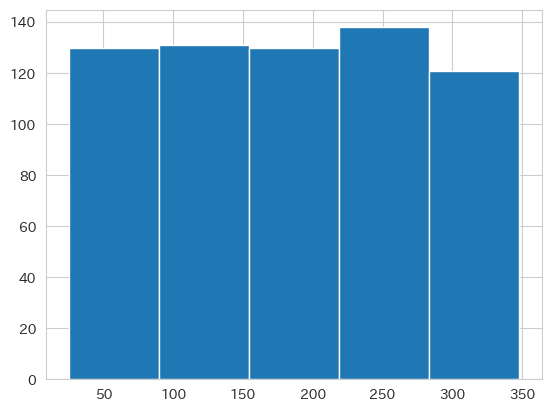

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
counts, bin_edges, patches = ax.hist(selectedtarget, bins=5)
bin_info = []

# 各ビンの範囲を表示
for i in range(len(counts)):
    left = bin_edges[i]
    right = bin_edges[i+1]
    height = counts[i]
    print(f"Bin {i+1}: {left:.2f} to {right:.2f}, Count = {int(height)}")
    bin_info.append([float(left), float(right), int(height)])
print(bin_info)

# **以上は誤ったデータ拡張法なのでPythonマニア以外は読まなくて良かったです。（終わり）**

In [ ]:
X = np.array(df_selected.loc[:, 'age':'glu'])
Y = selectedtarget
X.shape, Y.shape

((650, 10), (650,))

Fold 0:
実測値 =[ 75. 110. 309. 101. 185. 118. 144. 204. 282. 339.  65. 102. 265. 276.
 100. 142. 142.  37. 170. 170. 162. 252. 113. 164.  83. 232. 229. 230.
 277. 200. 173. 161. 274. 336. 337. 281. 118. 174. 173. 128. 217. 172.
  59.  70. 218. 268.  47.  74. 295. 295. 296. 297. 151. 265. 101. 141.
  79. 293. 122. 202.  77.  70.  65. 154. 257. 277. 275. 177. 215. 302.
 150. 310. 346. 310. 308.  74.  45. 115.  87. 184.  66. 283. 281. 281.
 156.  60. 331. 199.  85. 236. 173. 142. 109. 250. 248. 239. 270.  96.
 307. 214.  95. 216. 178. 139.  88.  71.  90. 311. 310. 312. 281. 323.
 320. 168. 245. 219.  51.  63. 198.  93. 168. 140. 189.  84. 111.  49.
  48. 178. 132. 220.]
予測値 =[107.86525  240.38206  230.68202  151.5695   144.20128  101.07368
 225.65852  202.46608  183.97957  281.2862   181.87993  151.76471
 116.35003  146.75462  220.6526   163.81223  150.49706  111.64798
 157.11537  208.8004   164.94667  167.44633  171.26299  142.50594
 150.6542   201.25493  209.09085  209.0342   233.12828  1

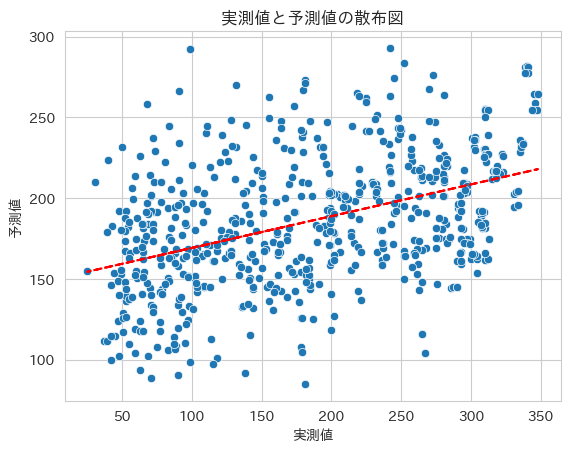

回帰直線: y= 
0.1965 x + 149.7
相関係数:          実測値       予測値
実測値  1.000000  0.438819
予測値  0.438819  1.000000


In [ ]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X, Y)
#print(kf)
y_index_list = []
y_test_list = []
y_pred_list = []

X = pds.DataFrame(X)
Y = pds.DataFrame(Y)
#参加者番号を取得するためにPandasのDataFrameに変換する

for i, (train_index, test_index) in enumerate(kf.split(X, Y)):
    print(f"Fold {i}:")
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test = Y.iloc[test_index]
    y_train=np.reshape(y_train,(-1))
    y_test=np.reshape(y_test,(-1))
    estimator = KerasRegressor(model=reg_model2, epochs=100, batch_size=10, verbose=0)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(f"実測値 ={y_test}")
    print(f"予測値 ={y_pred}")
    mse = mean_squared_error(y_test, y_pred)
    print("KERAS REG RMSE : %.2f" % (mse ** 0.5))
    y_index_list.append(test_index)
    y_test_list.append(y_test)
    y_pred_list.append(y_pred)
    #print()

index_list = flatten(y_index_list)
#print(len(index_list))
#print(index_list)
#print()
y_val_list = flatten(y_test_list)
#print(len(y_val_list))
#print(y_val_list)
#print()
y_pred_val_list = flatten(y_pred_list)
#print(len(y_pred_val_list))
#print(y_pred_val_list)

df = pds.DataFrame([y_val_list, y_pred_val_list]).T#Pandasのデータフレーム化
df_new = df.rename(columns={0: '実測値', 1:'予測値'})#列名の変更
sns.scatterplot(x='実測値',y='予測値',data=df_new)
plt.title('実測値と予測値の散布図')
plt.xlabel('実測値')
plt.ylabel('予測値')
z = np.polyfit(y_val_list, y_pred_val_list, 1)#線形回帰直線の計算
p = np.poly1d(z)
plt.plot(y_val_list, p(y_val_list), "r--")
plt.show()
print(f"回帰直線: y={p}")
res=df_new.corr() #PandasのDataFrameで相関係数を計算する
print(f"相関係数:{res}")

In [ ]:
from scipy.stats import t

r = 0.438819#これは大きな値！
n = 650
#無相関検定をやってみる
t_stat = r * np.sqrt((n - 2) / (1 - r ** 2))
p_val = 2 * t.sf(np.abs(t_stat), df=n - 2)
print(p_val)
#相関係数は5.679333879882503e-32

5.679333879882503e-32


# 間違い！
しかし以下のことがわかった。

**特定の関心データ領域に焦点を当て、選択的にデータ拡張を適用する部分調整型ダブルディッピングは、データセット全体に一様にデータ補強を適用する従来のダブルディッピングよりも、魔法的ブードゥー相関というイカサマを成功裏に達成する上で効果的である**。

# **正しいデータ拡張法による回帰モデル**

これはデータサイズと分布の元々の偏りにより、さほど効果はありませんが、double dippingの無い正しい方法である。データ拡張は交差評価の各foldにおいてトレーニングセットにだけ適用されるが、テストセットは1実験参加者に対し、1データの原則が守られる。

KFold(n_splits=5, random_state=0, shuffle=True)
Fold 0:
train_participant_index: [  0   2   3   4   5   7   8   9  11  13  14  16  17  18  19  20  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42
  43  44  45  46  47  48  50  51  53  55  57  58  61  62  63  64  66  67
  68  69  70  72  73  74  75  77  79  80  81  82  83  84  85  86  87  88
  89  91  92  93  94  95  97  98  99 101 103 104 105 106 108 109 110 111
 112 114 115 116 117 119 120 121 123 125 126 127 128 129 130 131 133 135
 136 137 138 139 140 143 145 146 147 148 149 150 151 152 153 154 156 161
 162 163 165 166 167 168 169 172 173 174 175 176 177 178 180 181 182 183
 184 185 187 189 190 191 192 193 195 196 197 199 200 201 202 203 204 207
 209 210 211 212 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 234 235 236 237 239 240 241 242 243 244 245 246 247
 248 250 251 252 253 254 255 256 257 258 259 260 262 263 264 265 266 267
 269 270 272 273 274 275 277 278 279 280 28

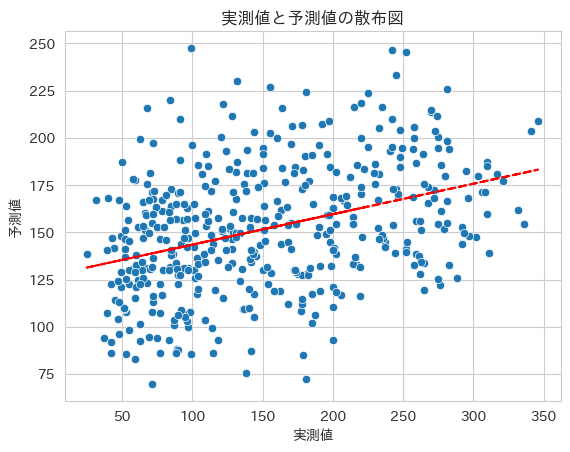

回帰直線: y= 
0.1612 x + 127.4
相関係数:          実測値       予測値
実測値  1.000000  0.372775
予測値  0.372775  1.000000


In [ ]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X, Y)
print(kf)
y_index_list = []
y_test_list = []
y_pred_list = []


X = np.array(noisy_diabetes.data)
Y = noisy_diabetes.target

X = pds.DataFrame(X)
Y = pds.DataFrame(Y)

df_total = pds.DataFrame(total_noisy_diabetes.data, columns=("participants", "sessions", "age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"))
X_total = np.array(df_total.loc[:, 'age':'glu'])
Y_total = flatten(np.array(total_noisy_diabetes.target))#good.

#training, testのdata splitはX, Yという実験参加者ベースで行い、
#trainingだけ、training用の実験参加者Xに対応するX_totalからの全セッションと,それらに対応するY_totalからのtarget valuesを使う。
#testは、data augmentationをしていない、X, Yからの値を使う

for i, (train_index, test_index) in enumerate(kf.split(X, Y)):#X,Yのままsplit
    print(f"Fold {i}:")
    print(f"train_participant_index: {train_index}")
    print(f"X_train_participant_index_size: {len(train_index)}")
    #X_train = X.iloc[train_index]
    #これはtraining用の実験参加者の全sessionsデータを使う
    #train_indexのparticipants numberに相当する全sessionsを抽出する。
    #train_indexと同じparticipants番号を含む行を検索した上で、participants行、sessions行をはずせばよい。
    selected_train_sessions = df_total.query('participants in @train_index')
    X_train = np.array(selected_train_sessions.loc[:, 'age':'glu'])
    print(f"X_train: {X_train}")
    print(f"X_train_size: {len(X_train)}")

    X_test = X.iloc[test_index]
    #これはtest用の実感参加者の最初のデータだけでそのまま使う

    #y_train = Y.iloc[train_index]
    #これはtraining用の実験参加者の全sessionsデータに対応するターゲット値を使う
    #selected_train_sessionsのsessionsナンバーをすべて抽出し、
    #Y_totalのうち、その位置にある要素をy_trainとして列挙
    selected_train_session_numbers = list(selected_train_sessions.index)
    y_train = [float(j) for j in [Y_total[i] for i in selected_train_session_numbers]]
    print(f"y_train: {y_train}")
    print(f"y_train_size: {len(y_train)}")

    y_test = Y.iloc[test_index]
    #これはそのまま使う


    y_train=np.reshape(y_train,(-1))
    y_test=np.reshape(y_test,(-1))
    estimator = KerasRegressor(model=reg_model2, epochs=100, batch_size=10, verbose=0)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(f"実測値 ={y_test}")
    print(f"予測値 ={y_pred}")
    mse = mean_squared_error(y_test, y_pred)
    print("KERAS REG RMSE : %.2f" % (mse ** 0.5))
    y_index_list.append(test_index)
    y_test_list.append(y_test)
    y_pred_list.append(y_pred)
    #print()

index_list = flatten(y_index_list)
#print(len(index_list))
#print(index_list)
#print()
y_val_list = flatten(y_test_list)
#print(len(y_val_list))
#print(y_val_list)
#print()
y_pred_val_list = flatten(y_pred_list)
#print(len(y_pred_val_list))
#print(y_pred_val_list)

df = pds.DataFrame([y_val_list, y_pred_val_list]).T#Pandasのデータフレーム化
df_new = df.rename(columns={0: '実測値', 1:'予測値'})#列名の変更
sns.scatterplot(x='実測値',y='予測値',data=df_new)
plt.title('実測値と予測値の散布図')
plt.xlabel('実測値')
plt.ylabel('予測値')
z = np.polyfit(y_val_list, y_pred_val_list, 1)#線形回帰直線の計算
p = np.poly1d(z)
plt.plot(y_val_list, p(y_val_list), "r--")
plt.show()
print(f"回帰直線: y={p}")
res=df_new.corr() #PandasのDataFrameで相関係数を計算する
print(f"相関係数:{res}")


# **著作権を配慮したコード引用記載**

**次のセルは著作権の尊重のため、掲載するだけで実行はしません。**

In [ ]:
#このセルは原作者のコードを尊重するために掲載しますが実行はしません。

# create regression model
def reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
    #ここでは損失関数として、平均二乗誤差（MSE：Mean Squared Error）とは、各データに対して平均二乗誤差（MSE：Mean Squared Error）すなわち予測値と正解値の差である誤差の二乗を計算し、その総和をデータ数で割った値（平均値）を出力する関数を使っている。


In [ ]:
#このセルは原作者のコードを尊重するために掲載しますが実行はしません。
#通りますがwarningが出ます。
"""
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
"""
# show the model summary
reg_model().summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_245 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_246 (Dense)                    │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_247 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#このセルは原作者のコードを尊重するために掲載しますが実行はしません。
#通りますが以下のwarningが出ます。
"""
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
 """

# use data split and fit to run the model
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
estimator = KerasRegressor(build_fn=reg_model, epochs=100, batch_size=10, verbose=0)
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)

# show its root mean square error
mse = mean_squared_error(y_test, y_pred)
print("KERAS REG RMSE : %.2f" % (mse ** 0.5))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KERAS REG RMSE : 56.18


In [ ]:
#このセルは原作者のコードを尊重するために掲載しますが実行はしません。
#通りますが以下のwarningが出ます。
"""
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
 """
# use Kfold and cross validation to run the model
seed = 7
np.random.seed(seed)
estimator = KerasRegressor(build_fn=reg_model, epochs=100, batch_size=10, verbose=0)
#授業中時間がかかるかもしれません。 KERAS REG RMSE : 55.79
#estimator = KerasRegressor(build_fn=reg_model, epochs=10, batch_size=10, verbose=0)
#時間短縮のため、epochsを10に減らすと、KERAS REG RMSE : 137.16
#kfold = KFold(n_splits=10, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
# show its root mean square error
results = cross_val_score(estimator, X, Y, scoring='neg_mean_squared_error', cv=kfold)
mse = -results.mean()
print("KERAS REG RMSE : %.2f" % (mse ** 0.5))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

KERAS REG RMSE : 55.27
